# Air Quality in New York

Situationship: We are working for a non-profit organization that is analyzing air quality in New York City. By analyzing the Air Quality dataset from the US Environmental Protection Agency (EPA), we aim to write health guidelines by identifying areas with the cleanest air. In particular, we will be looking into the annual average fine particlulate matter (PM 2.5) emissions. 

We will analyze a reduced version of the Air Quality dataset that contains information on New York City air quality surveillance data. 

- `geo_place_name`: name of the geographical region being measured.
- `data_value`: annual average measurement of fine particles, measured in mcg/m3.
- `year`: the year the measurements correspond to.

In [1]:
!pip install folium --quiet
!pip install ipywidgets --quiet


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
#import relevant modules

import pandas as pd
import matplotlib.pyplot as plt
import folium


In [3]:
# def get_list(column_name):
#     # Path to the CSV file
#     csv_path = 'air_quality_data.csv'
    
#     try:
#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(csv_path)
        
#         if column_name in df.columns:
#             # Return the column data as a list
#             return df[column_name].tolist()
#         else:
#             # If the column does not exist, raise an error
#             raise ValueError("Column name not found in the DataFrame")
#     except Exception as e:
#         print(f"An error occurred: {e}")

In [4]:
# geo_place_name = get_list('geo_place_name')
# data_value = get_list('data_value')
# year = get_list('year')

NameError: name 'get_list' is not defined

In [5]:
df = pd.read_csv('Air_Quality.csv')
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97,NaN
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42,NaN
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55,NaN
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63,NaN
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00,NaN


In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['unique_id', 'indicator_id', 'name', 'measure', 'measure_info',
       'geo_type_name', 'geo_join_id', 'geo_place_name', 'time_period',
       'start_date', 'data_value', 'message'],
      dtype='object')

In [7]:
df.head()

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,message
0,336867,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2014-15,12/01/2014,23.97,NaN
1,336741,375,Nitrogen dioxide (NO2),Mean,ppb,CD,107,Upper West Side (CD7),Winter 2014-15,12/01/2014,27.42,NaN
2,550157,375,Nitrogen dioxide (NO2),Mean,ppb,CD,414,Rockaway and Broad Channel (CD14),Annual Average 2017,01/01/2017,12.55,NaN
3,412802,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Winter 2015-16,12/01/2015,22.63,NaN
4,412803,375,Nitrogen dioxide (NO2),Mean,ppb,CD,407,Flushing and Whitestone (CD7),Summer 2016,06/01/2016,14.00,NaN


In [8]:
# Get the sum of all the values
sum_fine_particles = sum(df['data_value'])

# Print out the sum
print("The sum of the annual average values of Fine Particles is ", sum_fine_particles)

The sum of the annual average values of Fine Particles is  397074.9049080302


In [9]:
average_fine_particles = sum_fine_particles / len(df.data_value)

print("The average values of Fine Particles is:", average_fine_particles)

The average values of Fine Particles is: 21.051580156294676


In [10]:
df['start_date'] = pd.to_datetime(df['start_date'])

# Extract year and month
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month


In [11]:
# Find the maximum value
max_value = df.data_value.max()

# Find the index where the maximum occurred
idx_max_value = df.data_value.idxmax()

# Find the region where the maximum occurred
region_max = df.geo_place_name[idx_max_value]

# Find the year where the maximum occurred
year_max = df.year[idx_max_value]

# Print the results
print("The maximum fine particle emissions were ", max_value, 
      " and they happened at ", 
      region_max, " in the year ", year_max)

The maximum fine particle emissions were  424.7  and they happened at  Central Harlem - Morningside Heights  in the year  2005


In [32]:
df['CD'] = df['geo_place_name'].str.extract(r'\((CD\d+)\)')

print(df['CD'].unique())

['CD7' 'CD14' nan 'CD15' 'CD13' 'CD8' 'CD6' 'CD4' 'CD10' 'CD12' 'CD3'
 'CD17' 'CD1' 'CD2' 'CD16' 'CD5' 'CD9' 'CD11' 'CD18']


In [13]:
# Define a threshold for high observations
threshold = 35

high_observations = df[df['data_value'] > threshold]

# Group by 'geo_place_name' and count the number of observations
observation_counts = high_observations.groupby('CD').size()

# Display the result
print(observation_counts)

CD
CD1     26
CD10    31
CD11    23
CD12    28
CD13    18
CD14    19
CD15    12
CD16     7
CD17     7
CD18    12
CD2     30
CD3     29
CD4     29
CD5     47
CD6     34
CD7     26
CD8     26
CD9     27
dtype: int64


In [14]:
df['time_period'].unique()

array(['Winter 2014-15', 'Annual Average 2017', 'Winter 2015-16',
       'Summer 2016', 'Annual Average 2018', 'Annual Average 2016',
       'Winter 2021-22', 'Annual Average 2021', 'Summer 2009',
       'Winter 2010-11', 'Annual Average 2013', 'Summer 2021',
       'Winter 2020-21', 'Summer 2010', 'Summer 2011', 'Summer 2012',
       'Summer 2013', 'Winter 2013-14', 'Annual Average 2019',
       'Winter 2017-18', 'Annual Average 2022', 'Winter 2008-09',
       'Summer 2019', 'Summer 2015', 'Winter 2019-20',
       'Annual Average 2023', 'Winter 2022-23', 'Winter 2012-13',
       'Annual Average 2010', 'Annual Average 2012', 'Summer 2022',
       'Annual Average 2014', 'Summer 2020', '2015',
       'Annual Average 2015', 'Summer 2014', 'Winter 2018-19', '2013',
       'Winter 2011-12', 'Summer 2017', 'Summer 2018', 'Summer 2023',
       'Winter 2016-17', 'Winter 2009-10', 'Annual Average 2009',
       'Annual Average 2011', 'Annual Average 2020', '2012-2014',
       '2015-2017', '2005'

In [15]:
sorted_df = df.sort_values(by='time_period', ascending=True)

sorted_df.head()

,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value,message,year,month,CD
12664,151686,644,Annual vehicle miles traveled (cars),Million miles,per square mile,UHF42,209,Bensonhurst - Bay Ridge,2005,2005-01-01,44.768810,NaN,2005,1,NaN
14771,151681,644,Annual vehicle miles traveled (cars),Million miles,per square mile,UHF42,204,East New York,2005,2005-01-01,48.814507,NaN,2005,1,NaN
14772,151674,644,Annual vehicle miles traveled (cars),Million miles,per square mile,UHF42,104,Pelham - Throgs Neck,2005,2005-01-01,37.527186,NaN,2005,1,NaN
12930,154537,644,Annual vehicle miles traveled (cars),Million miles,per square mile,CD,313,Coney Island (CD13),2005,2005-01-01,30.491451,NaN,2005,1,CD13
16696,151755,645,Annual vehicle miles traveled (trucks),Million miles,per square mile,UHF42,409,Southeast Queens,2005,2005-01-01,1.418632,NaN,2005,1,NaN


In [16]:
# Calculate the average values of emissions by CD
average_emissions = high_observations.groupby('CD')['data_value'].mean()

# Display the result
print(average_emissions)

CD
CD1     66.156315
CD10    60.202402
CD11    72.290011
CD12    62.222783
CD13    49.215206
CD14    43.786103
CD15    43.197177
CD16    67.945006
CD17    66.966953
CD18    38.224765
CD2     79.324191
CD3     68.907155
CD4     77.314613
CD5     57.378078
CD6     87.379005
CD7     76.617163
CD8     78.087196
CD9     66.719352
Name: data_value, dtype: float64


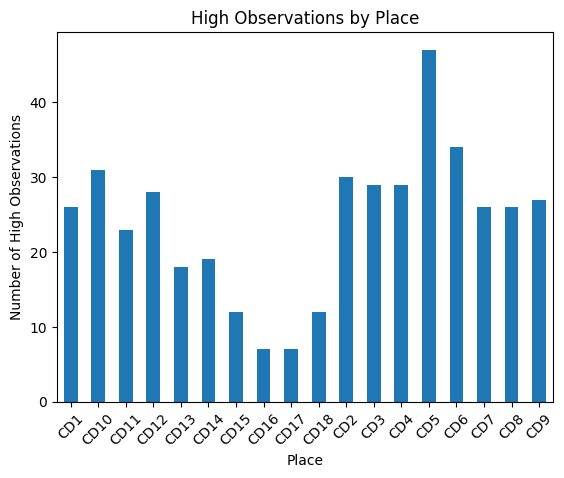

In [17]:
observation_counts.plot(kind='bar', title='High Observations by Place')
plt.xlabel('Place')
plt.ylabel('Number of High Observations')
plt.xticks(rotation=45)
plt.show()

In [18]:
location = 'Central Harlem - Morningside Heights'
period_1_name = 'Winter 2014-15'
period_2_name = '2005'

# Get the data values for the two periods
value_p1 = df[(df['geo_place_name'] == location) & (df['time_period'] == period_1_name)]['data_value'].iloc[0]
value_p2 = df[(df['geo_place_name'] == location) & (df['time_period'] == period_2_name)]['data_value'].iloc[0]

# 3. Perform Calculations
absolute_change = value_p2 - value_p1
percent_change = ((value_p2 - value_p1) / value_p1) * 100

# 4. Print Results
print(f"Comparison for: {location}")
print(f"NO2 (ppb) in {period_1_name}: {value_p1}")
print(f"NO2 (ppb) in {period_2_name}: {value_p2}")
print(f"\nAbsolute Change (ppb): {absolute_change:.2f}")
print(f"Percent Change: {percent_change:.2f}%")

# Interpretation: A negative change means the air quality has improved (lower NO2).
if absolute_change < 0:
    print(f"\nInterpretation: Air quality improved by {-percent_change:.2f}% (NO2 decreased).")
elif absolute_change > 0:
    print(f"\nInterpretation: Air quality worsened by {percent_change:.2f}% (NO2 increased).")
else:
    print("\nInterpretation: NO2 levels remained the same.")

Comparison for: Central Harlem - Morningside Heights
NO2 (ppb) in Winter 2014-15: 26.74
NO2 (ppb) in 2005: 4.2

Absolute Change (ppb): -22.54
Percent Change: -84.29%

Interpretation: Air quality improved by 84.29% (NO2 decreased).


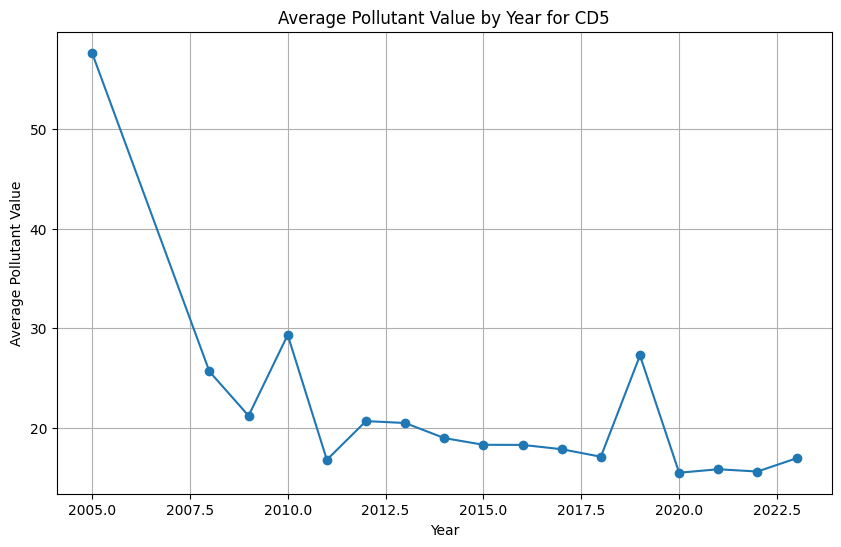

In [19]:
import re
desired_place = 'CD5'
filtered_data = df[df['CD'] == desired_place].copy()

# Function to extract the year
def extract_year(time_period):
    match = re.search(r'\b\d{4}\b', time_period)
    if match:
        return int(match.group(0))
    return None

# Apply the function to extract the year
filtered_data.loc[:, 'year'] = filtered_data['time_period'].apply(extract_year).astype('int32')
# Group by year and calculate the average pollutant value
yearly_trend = filtered_data.groupby('year')['data_value'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o')
plt.title('Average Pollutant Value by Year for CD5')
plt.xlabel('Year')
plt.ylabel('Average Pollutant Value')
plt.grid(True)
plt.show()

There's a trend in the pollutant peak in 2005, then slowly lowers down till 2020.

In [34]:
cd5_places = df[df['CD'] == 'CD5']['geo_place_name'].unique().tolist()

print(cd5_places)


['Midtown (CD5)', 'Fordham and University Heights (CD5)', 'East New York and Starrett City (CD5)', 'Ridgewood and Maspeth (CD5)']


Next option is to have interactive dashboard - which we can explored later